### 3.4 Classifying Movie Reviews

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17424384/17464789 [============================>.] - ETA: 0s

In [32]:
train_data.shape

(25000,)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
# A Look at the training data
max([max(sequence) for sequence in train_data])

9999

In [12]:
dir(imdb)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_remove_long_seq',
 'absolute_import',
 'get_file',
 'get_word_index',
 'json',
 'load_data',
 'np',
 'warnings',
 'zip']

In [13]:
# Decoding the integer sequences back into sentences

# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index() 

1589248/1641221 [============================>.] - ETA: 0s

In [14]:
word_index

{'steffania': 40077,
 'imaginations': 10748,
 'unpractical': 52412,
 'klingon': 22984,
 'flopsy': 45846,
 'jovan': 62482,
 'directness': 34510,
 'tar': 19490,
 'spry': 34911,
 "'maytag": 65408,
 'guru': 8987,
 'besiege': 79911,
 'implausiblities': 64890,
 'pasty': 25514,
 'phantasmogoric': 67502,
 'qld': 86871,
 'heroic': 3815,
 'gelo': 85681,
 'lumpen': 62279,
 'speedily': 77089,
 'anacronisms': 66954,
 'baddies': 7724,
 'yancey': 62138,
 'penelope': 7224,
 'raunchily': 47804,
 'crassly': 34609,
 'burglary': 26734,
 'bridges': 5973,
 'hernandez': 15389,
 'mown': 55127,
 '30': 1085,
 'trove': 24141,
 'outflanking': 84326,
 'meaner': 20612,
 'introvert': 22570,
 'sower': 84713,
 'henceforth': 21277,
 "l'espace": 44482,
 'deeling': 68502,
 'joust': 56463,
 'hijinx': 46815,
 'hoffmann': 27967,
 'scape': 27066,
 'garmes': 49482,
 "promotion'": 73716,
 "'really's'": 77192,
 'husbands': 5305,
 'changeable': 63919,
 'forry': 68548,
 'i8n': 61151,
 'cheeee': 66433,
 'oooooozzzzzzed': 78491,
 '

In [16]:
# We reverse it, mapping integer indices to word
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [28]:
word_index.get('unknown')

1856

In [17]:
reverse_word_index

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'to',
 6: 'is',
 7: 'br',
 8: 'in',
 9: 'it',
 10: 'i',
 11: 'this',
 12: 'that',
 13: 'was',
 14: 'as',
 15: 'for',
 16: 'with',
 17: 'movie',
 18: 'but',
 19: 'film',
 20: 'on',
 21: 'not',
 22: 'you',
 23: 'are',
 24: 'his',
 25: 'have',
 26: 'he',
 27: 'be',
 28: 'one',
 29: 'all',
 30: 'at',
 31: 'by',
 32: 'an',
 33: 'they',
 34: 'who',
 35: 'so',
 36: 'from',
 37: 'like',
 38: 'her',
 39: 'or',
 40: 'just',
 41: 'about',
 42: "it's",
 43: 'out',
 44: 'has',
 45: 'if',
 46: 'some',
 47: 'there',
 48: 'what',
 49: 'good',
 50: 'more',
 51: 'when',
 52: 'very',
 53: 'up',
 54: 'no',
 55: 'time',
 56: 'she',
 57: 'even',
 58: 'my',
 59: 'would',
 60: 'which',
 61: 'only',
 62: 'story',
 63: 'really',
 64: 'see',
 65: 'their',
 66: 'had',
 67: 'can',
 68: 'were',
 69: 'me',
 70: 'well',
 71: 'than',
 72: 'we',
 73: 'much',
 74: 'been',
 75: 'bad',
 76: 'get',
 77: 'will',
 78: 'do',
 79: 'also',
 80: 'into',
 81: 'people',
 82: 'other',
 8

In [29]:
# We decode the review; note that our indices were offset by 3
# because 0, 1, and 2 are reserved indices for "padding", "start of sequence", and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[1]])

In [30]:
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [34]:
# Listing 3.12. Encoding the integer sequences into a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to be 1s
    return results

In [35]:
# Our vectorized training_data
x_train = vectorize_sequences(train_data)

In [37]:
x_train.shape

(25000, 10000)

In [38]:
x_test = vectorize_sequences(test_data)

In [39]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [42]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [43]:
# 3.15 Our odel definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [44]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])


In [45]:
# 3.19 Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [46]:
# 3.20 Training our model
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s - loss: 0.5162 - acc: 0.7888 - val_loss: 0.4017 - val_acc: 0.8646
Epoch 2/20
15000/15000 [==============================] - 2s - loss: 0.3146 - acc: 0.9030 - val_loss: 0.3238 - val_acc: 0.8792
Epoch 3/20
15000/15000 [==============================] - 2s - loss: 0.2319 - acc: 0.9243 - val_loss: 0.2808 - val_acc: 0.8925
Epoch 4/20
15000/15000 [==============================] - 2s - loss: 0.1816 - acc: 0.9427 - val_loss: 0.2730 - val_acc: 0.8906
Epoch 5/20
15000/15000 [==============================] - 2s - loss: 0.1502 - acc: 0.9518 - val_loss: 0.2777 - val_acc: 0.8883
Epoch 6/20
15000/15000 [==============================] - 2s - loss: 0.1216 - acc: 0.9630 - val_loss: 0.3187 - val_acc: 0.8812
Epoch 7/20
15000/15000 [==============================] - 2s - loss: 0.1038 - acc: 0.9688 - val_loss: 0.3032 - val_acc: 0.8856
Epoch 8/20
15000/15000 [==============================] - 2s 

In [47]:
# 3.21 THe history dictionary
history_dict = history.history
history_dict.keys()

dict_keys(['acc', 'val_acc', 'val_loss', 'loss'])

In [48]:
# 3.22 Plotting the training and validation loss
import matplotlib.pyplot as plt


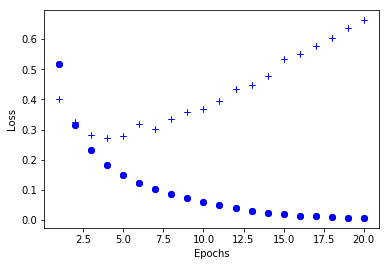

In [50]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blot dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for blue crosses
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

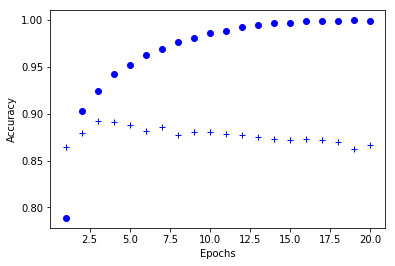

In [53]:
plt.clf() # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blot dot"
plt.plot(epochs, acc_values, 'bo')
# b+ is for blue crosses
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [54]:
# 3.24 Re-training a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s - loss: 0.4715 - acc: 0.8101     
Epoch 2/4
25000/25000 [==============================] - 2s - loss: 0.2653 - acc: 0.9077     
Epoch 3/4
25000/25000 [==============================] - 2s - loss: 0.2023 - acc: 0.9274     
Epoch 4/4
24992/25000 [============================>.] - ETA: 0s

In [55]:
results

[0.29112064001083376, 0.88575999999999999]

In [56]:
# 3.26 Generating predictions for new data
model.predict(x_test)

array([[ 0.92481065],
       [ 0.82815194],
       [ 0.99948895],
       ..., 
       [ 0.4480747 ],
       [ 0.00374659],
       [ 0.80961978]], dtype=float32)